In [1]:
# load packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

pd.options.display.max_colwidth = 400

### Load Data (Cats and Dogs)

In [2]:
df_cats = pd.read_csv('cats.csv')
df_dogs = pd.read_csv('dogs.csv')

In [3]:
df_cats = df_cats.drop(columns='Unnamed: 0')
df_cats.head()

,subreddit,title
0,cats,I came home sick from work with pneumonia. Here is where I found my wife's cat watching TV then noticing me taking pictures.
1,cats,My sleepyhead curled up this morning
2,cats,"Spooky takes care of me when I WFH, who needs HR when you've got H-Aww?!"
3,cats,Hi! I am a new cat mom and am hoping someone might have experience with something similar to my cats ear. Details in post comments.
4,cats,"Spooky looks after me when I WFH, who needs a HR department when you can have a H-Aww department?"


In [4]:
df_dogs = df_dogs.drop(columns='Unnamed: 0')
df_dogs.head()

,subreddit,title
0,dogs,My dog bites himself
1,dogs,How do you keep your dogs passively stimulated?
2,dogs,Dog's Sleeping Behavior Changed with Pregnant Wife
3,dogs,Soft food diet after surgery
4,dogs,Does anyone know much about Intracranial Arachnoid Cysts?


### EDA on Titles

In [5]:
df_cats['title_length'] = df_cats['title'].map(len)

In [6]:
df_cats['title_word_count'] = df_cats['title'].map(lambda x: len(x.split()))

### Longest and Shortest Titles

In [7]:
df_cats.sort_values(by='title_word_count', ascending = True)[['title']].head()

,title
4997,Inquisitive&lt;3
4909,Brothers
4953,catloaf
4960,Cider!
9934,Sleepy


In [8]:
df_cats.sort_values(by='title_word_count', ascending=False)[['title']].head()

,title
2396,"This is Maximus. He is 13, used to sleep in our room but has started to wake us up at 0330 for food &amp; not when we get up. He plays with the door knob, pushes against the door, &amp; meows incessantly. We've tried tape on the door knob, tin foil in front of the door, a fan to drown him out. Any ideas?"
8825,"I'm traveling now and I miss Piu, 10yo. Last time we hugged was Dec 13 and I sent him to my grandmas farm where he's safe. I swear I'm dying from too much saudade, I even cried in here some days. I'm grateful for having him as my friend since day 1 of his life and I want to share it with you."
3790,"Two days ago we found this stray cat, we noticed that his eyes are not well, and also he sleeps a lot and spends a lot of time resting. I would like someone to please tell me what is happening to him, as we live far away from the city, and at this time of the year all the vets are on vacation."
214,Been away from home for two days now and today I hear one of my boys had passed away. Not only did it ruin my entire day but has left my heart aching and left me feverish. I dont know how to cope with this and I don't know how his only sibling has been coping with his death either. RIP little one
5074,"This is Sirius Black. He is 3 months old. He was left to die on my front yard and my mom found him. We decided to foster him but found out he couldn't pee, so I took him to the vet, he had to go under surgery and now he has a pee collector (?) in his belly. Finally, I adopted him!"


### Distribution of Title Lengths and Title Word Counts

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='Cats - Title Word Count'>

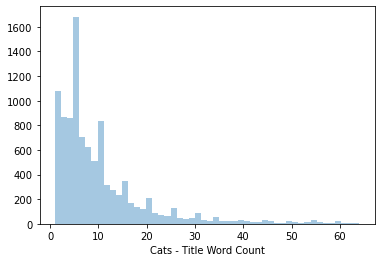

In [68]:
sns.distplot(df_cats['title_word_count'],
             axlabel='Cats - Title Word Count',
             kde=False)

<AxesSubplot:xlabel='Cats - Title Length'>

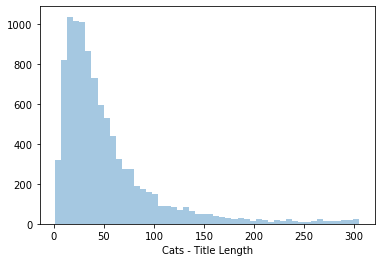

In [69]:
sns.distplot(df_cats['title_length'],
             axlabel = 'Cats - Title Length',
             kde=False)

## Clean and Tokenise (Cats)

In [12]:
# !pip install nltk

In [13]:
df_cats['title'] = df_cats['title'].str.replace(r'[^\w\s]+', '', regex = True)
df_cats['title'] = [x.lower() for x in df_cats['title']]

In [14]:
# manually removing capitals and splitting into words
df_cats['words'] = [x.split() for x in df_cats['title']]

In [15]:
df_cats.head()

,subreddit,title,title_length,title_word_count,words
0,cats,i came home sick from work with pneumonia here is where i found my wifes cat watching tv then noticing me taking pictures,124,23,"[i, came, home, sick, from, work, with, pneumonia, here, is, where, i, found, my, wifes, cat, watching, tv, then, noticing, me, taking, pictures]"
1,cats,my sleepyhead curled up this morning,36,6,"[my, sleepyhead, curled, up, this, morning]"
2,cats,spooky takes care of me when i wfh who needs hr when youve got haww,72,15,"[spooky, takes, care, of, me, when, i, wfh, who, needs, hr, when, youve, got, haww]"
3,cats,hi i am a new cat mom and am hoping someone might have experience with something similar to my cats ear details in post comments,131,25,"[hi, i, am, a, new, cat, mom, and, am, hoping, someone, might, have, experience, with, something, similar, to, my, cats, ear, details, in, post, comments]"
4,cats,spooky looks after me when i wfh who needs a hr department when you can have a haww department,97,19,"[spooky, looks, after, me, when, i, wfh, who, needs, a, hr, department, when, you, can, have, a, haww, department]"


## EDA

In [16]:
cv = CountVectorizer(stop_words='english', min_df=3)
cv.fit(df_cats['title'])

status_cv = cv.transform(df_cats['title'])
status_df = pd.DataFrame(status_cv.todense(), columns=cv.get_feature_names())

### Show the 15 most common words

In [17]:
status_df.sum().sort_values(ascending=False).head(15)

cat       2818
cats       726
new        612
just       499
like       428
little     402
year       380
kitten     333
im         304
old        298
kitty      285
got        285
love       284
happy      278
help       272
dtype: int64

### Show the 15 frequency of the most common words as a bar chart

<AxesSubplot:ylabel='15 Most Common Words (Cats)'>

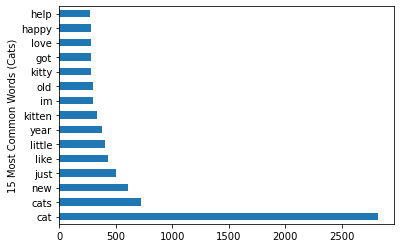

In [77]:
status_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', xlabel ='15 Most Common Words (Cats)')

### Most Common Bigrams

In [19]:
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams.fit(df_cats['title'])

bigrams_cv = cv_bigrams.transform(df_cats['title'])
bigrams_df = pd.DataFrame(bigrams_cv.todense(), columns=cv_bigrams.get_feature_names())

bigrams_df.sum().sort_values(ascending=False).head(15)

new year       206
happy new      152
new years       78
does cat        61
year old        55
months old      52
litter box      46
new cat         45
looks like      44
dont know       43
years old       43
new kitten      43
month old       38
best friend     37
just wanted     36
dtype: int64

<AxesSubplot:ylabel='15 Most Common Bigrams (Cats)'>

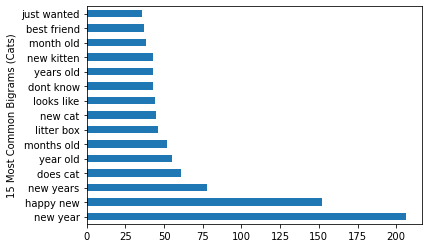

In [78]:
bigrams_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', xlabel='15 Most Common Bigrams (Cats)')

### Most Common Trigrams

In [20]:
cv_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams.fit(df_cats['title'])

trigrams_cv = cv_trigrams.transform(df_cats['title'])
trigrams_df = pd.DataFrame(trigrams_cv.todense(), columns=cv_trigrams.get_feature_names())

trigrams_df.sum().sort_values(ascending=False).head(15)

happy new year       138
new years eve         22
just wanted share     19
cat wont stop         15
year old cat          13
time cat owner        13
happy new years       11
wishes happy new      11
month old kitten      10
new years day          9
does elses cat         9
hello isnt cutest      8
cat looks like         7
new year cat           7
new year new           7
dtype: int64

<AxesSubplot:ylabel='15 Most Common Trigrams (Cats)'>

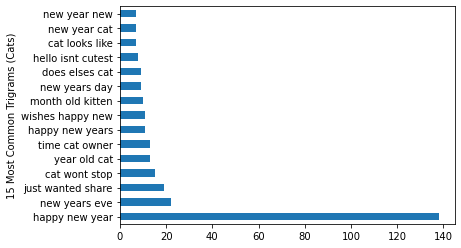

In [79]:
trigrams_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', xlabel = '15 Most Common Trigrams (Cats)')

---

## Dogs

### EDA on Titles

In [21]:
df_dogs['title_length'] = df_dogs['title'].map(len)

In [22]:
df_dogs['title_word_count'] = df_dogs['title'].map(lambda x: len(x.split()))

### Longest and Shortest Statuses

In [23]:
df_dogs.sort_values(by='title_word_count', ascending=True)[['title']].head()

,title
409,Tibi
5256,Help
1184,adoption
5228,Help!!!
4164,https://givesendgo.com/G2CXK?utm_source=sharelink&amp;utm_medium=copy_link&amp;utm_campaign=G2CXK


In [24]:
df_dogs.sort_values(by = 'title_word_count', ascending=False)[['title']].head()

,title
5203,My dog chewed on a tube of Arm and Hammer advance white toothpaste and she just chewed on the cap and there’s minor teeth marks on the bottom. I think she maybe ingested like 1/16th of a tsp. She’s hasn’t shown any symptoms and it was like 4 hrs ago. I have like $40 to my name so idk what to do
6516,"Hello guys! I'm wondering if you could please help me, my little girl Rosie who's a 10 year old Maltese x Yorkie has been developing these weird marks on her body which start off as just a mole and turn into a scab and then heal over but she keeps losing patches of her fur , please help me !"
8963,Is 36 hours post laceration too late for stitches? My fiancé cut my Yorkie while giving him a haircut 2 inches under the anus. The cut was 24 hours ago but I have a surgery schedule in 12 hours from now. I am scare that stitching too late could cause an infection and that the cut won’t heal properly
1571,"I've watched videos, read stuff, but somehow am still clueless about how to potty train my pup. My condition : he will live outside once older and for now he lives only in my room, I take him outside sometimes, at night it can get to 4-5 degree Celsius, keeping in mind a 7 week puppy. Please help."
6858,"Help ! My ten month has food allergies. We just cleared him out from the last one,he was allergic to lamb but he’s reacting to another food now &amp;&amp; is super itchy. He has raw spots from licking &amp;&amp; scratching. Gonna take him to the vet Monday but is there anything I can do in the mean time?"


### Distribution of Title Lengths

<AxesSubplot:xlabel='Dogs - Title Word Count'>

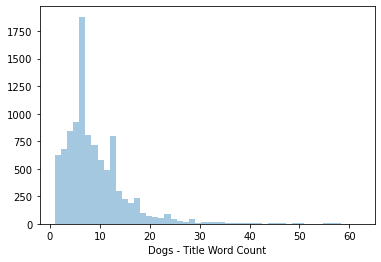

In [74]:
sns.distplot(df_dogs['title_word_count'],
             axlabel = 'Dogs - Title Word Count',
             kde=False)

<AxesSubplot:xlabel='Dogs - Title Length'>

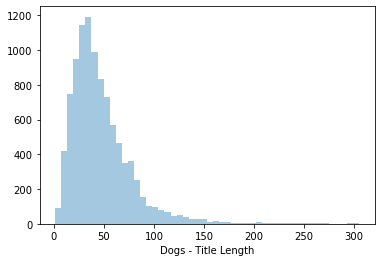

In [75]:
sns.distplot(df_dogs['title_length'], 
             axlabel = 'Dogs - Title Length',
             kde=False)

## Cleaning and Tokenise (Dogs)

In [27]:
df_dogs['title'] = df_dogs['title'].str.replace(r'[^\w\s]+', '', regex = True)

In [28]:
# manually removing capitals and splitting into words
df_dogs['words'] = [x.lower().split() for x in df_dogs['title']]
df_dogs['title'] = [x.lower() for x in df_dogs['title']]

In [29]:
df_dogs.head()

,subreddit,title,title_length,title_word_count,words
0,dogs,my dog bites himself,20,4,"[my, dog, bites, himself]"
1,dogs,how do you keep your dogs passively stimulated,47,8,"[how, do, you, keep, your, dogs, passively, stimulated]"
2,dogs,dogs sleeping behavior changed with pregnant wife,50,7,"[dogs, sleeping, behavior, changed, with, pregnant, wife]"
3,dogs,soft food diet after surgery,28,5,"[soft, food, diet, after, surgery]"
4,dogs,does anyone know much about intracranial arachnoid cysts,57,8,"[does, anyone, know, much, about, intracranial, arachnoid, cysts]"


### EDA on Word Counts

In [30]:
cv.fit(df_dogs['title'])

status_cv_dogs = cv.transform(df_dogs['title'])
status_df_dogs = pd.DataFrame(status_cv_dogs.todense(), columns=cv.get_feature_names())

### Show the 15 most common words

In [31]:
status_df_dogs.sum().sort_values(ascending=False).head(15)

dog       5015
dogs      1264
help       857
puppy      590
old        403
advice     377
need       328
does       303
breed      301
new        295
food       285
just       228
im         225
like       213
know       203
dtype: int64

### Show the 15 frequency of the most common words as a bar chart

<AxesSubplot:ylabel='15 Most Common Words (Dogs)'>

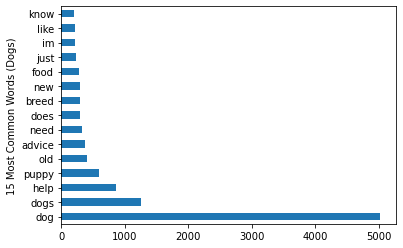

In [76]:
status_df_dogs.sum().sort_values(ascending=False).head(15).plot(kind='barh', xlabel='15 Most Common Words (Dogs)')

### Most Common Bigrams

In [33]:
cv_bigrams_dogs = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams_dogs.fit(df_dogs['title'])

bigrams_cv_dogs = cv_bigrams_dogs.transform(df_dogs['title'])
bigrams_df_dogs = pd.DataFrame(bigrams_cv_dogs.todense(), columns=cv_bigrams_dogs.get_feature_names())

bigrams_df_dogs.sum().sort_values(ascending=False).head(15)

year old       136
need help      116
does dog       114
help dog       109
dog food       106
dog ate         93
need advice     82
new dog         81
old dog         81
dog wont        75
month old       73
dont know       73
new puppy       66
dog breed       64
dog park        55
dtype: int64

<AxesSubplot:ylabel='15 Most Common Bigrams (Dogs)'>

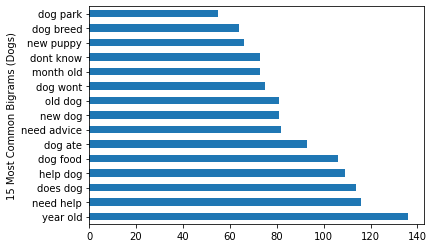

In [82]:
bigrams_df_dogs.sum().sort_values(ascending=False).head(15).plot(kind='barh', xlabel='15 Most Common Bigrams (Dogs)')

In [34]:
cv_trigrams_dogs = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams_dogs.fit(df_dogs['title'])

trigrams_cv_dogs = cv_trigrams_dogs.transform(df_dogs['title'])
trigrams_df_dogs = pd.DataFrame(trigrams_cv_dogs.todense(), columns=cv_trigrams_dogs.get_feature_names())

trigrams_df_dogs.sum().sort_values(ascending=False).head(15)

year old dog         42
month old puppy      21
dog wont stop        20
dog wont eat         19
new dog owner        16
dog passed away      15
dog ate chocolate    13
week old puppy       12
help dog ate         11
10 month old         11
dog doesnt like      10
does elses dog       10
dog dont know        10
13 year old           9
dog attacked dog      9
dtype: int64

<AxesSubplot:ylabel='15 Most Common Trigrams (Dogs)'>

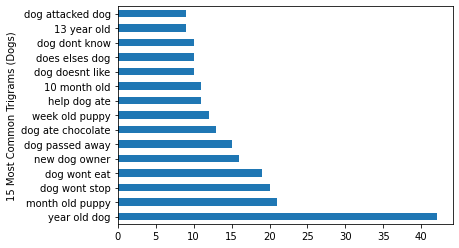

In [84]:
trigrams_df_dogs.sum().sort_values(ascending=False).head(15).plot(kind='barh', xlabel='15 Most Common Trigrams (Dogs)')

## Combine Dataframes

In [35]:
concat = [df_cats, df_dogs]
df = pd.concat(concat)

In [36]:
df.shape

(19941, 5)

In [37]:
df.head()

,subreddit,title,title_length,title_word_count,words
0,cats,i came home sick from work with pneumonia here is where i found my wifes cat watching tv then noticing me taking pictures,124,23,"[i, came, home, sick, from, work, with, pneumonia, here, is, where, i, found, my, wifes, cat, watching, tv, then, noticing, me, taking, pictures]"
1,cats,my sleepyhead curled up this morning,36,6,"[my, sleepyhead, curled, up, this, morning]"
2,cats,spooky takes care of me when i wfh who needs hr when youve got haww,72,15,"[spooky, takes, care, of, me, when, i, wfh, who, needs, hr, when, youve, got, haww]"
3,cats,hi i am a new cat mom and am hoping someone might have experience with something similar to my cats ear details in post comments,131,25,"[hi, i, am, a, new, cat, mom, and, am, hoping, someone, might, have, experience, with, something, similar, to, my, cats, ear, details, in, post, comments]"
4,cats,spooky looks after me when i wfh who needs a hr department when you can have a haww department,97,19,"[spooky, looks, after, me, when, i, wfh, who, needs, a, hr, department, when, you, can, have, a, haww, department]"


## Clean and Tokenise

### Stopword Removal

In [38]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [39]:
df = df.reset_index().drop(columns='index')

In [40]:
df[df['title'] == '']

,subreddit,title,title_length,title_word_count,words
56,cats,,1,1,[]
279,cats,,3,1,[]
281,cats,,1,1,[]
316,cats,,1,1,[]
369,cats,,3,1,[]
1101,cats,,2,1,[]
1119,cats,,2,1,[]
1337,cats,,2,1,[]
1439,cats,,1,1,[]
1443,cats,,1,1,[]


In [41]:
df = df[df['title'] != '']

In [42]:
df.sort_values(by = 'title', ascending = False)

,subreddit,title,title_length,title_word_count,words
4266,cats,𝚂𝚠𝚎𝚎𝚝 girl,14,3,"[𝚂𝚠𝚎𝚎𝚝, girl]"
4264,cats,𝚂𝚠𝚎𝚎𝚝 girl,14,3,"[𝚂𝚠𝚎𝚎𝚝, girl]"
10014,dogs,可爱小狗合集,6,1,[可爱小狗合集]
16341,dogs,加速主义,4,1,[加速主义]
7312,cats,ฅﻌฅ,7,1,[ฅﻌฅ]
...,...,...,...,...,...
16054,dogs,funny amp cute cats and dog video compilation 3,57,12,"[funny, amp, cute, cats, and, dog, video, compilation, 3]"
4165,cats,destructive cats love the bathroom laundry basket,54,9,"[destructive, cats, love, the, bathroom, laundry, basket]"
1955,cats,cuál es la respuesta más tonta que dieron por estar nervioss,65,12,"[cuál, es, la, respuesta, más, tonta, que, dieron, por, estar, nervioss]"
18818,dogs,adopting a street dog,24,5,"[adopting, a, street, dog]"


In [43]:
from nltk.corpus import stopwords

In [44]:
stop = set(stopwords.words('english'))
print(stop)

{'any', 'too', 'between', "mightn't", 'about', 'hadn', 'its', "you're", 'm', 'aren', 'can', 'that', 'before', 'each', 'll', 're', 'once', 'nor', 'o', 'over', 'yourselves', 'ourselves', 'i', 'out', 'shan', 'if', 'an', 'all', 'his', "won't", 'of', 'whom', 'how', "she's", 'because', 'her', 'wasn', 'herself', 'are', 'the', 's', 'when', "mustn't", 'had', 'or', "you've", 'she', 'at', "that'll", "don't", 'just', "wasn't", 'you', 'now', 'down', "it's", 'own', 'isn', 'both', 'am', 'after', 'it', 'they', 'very', 've', 'being', 'yours', "hadn't", 'and', 'did', 'our', "you'll", 'y', 'then', 'while', 'ma', "aren't", 'him', 'will', 'won', 'other', 'against', 'having', 'himself', 'to', 'so', 'these', 'this', 'as', 'further', "wouldn't", 'but', "isn't", "shouldn't", 'into', 'for', 'again', 'your', 'wouldn', 'does', "doesn't", 'off', 'he', 'hers', 'what', 'below', 'didn', 'same', "haven't", 'itself', 'weren', 'until', 'doesn', 'should', 'hasn', 'couldn', 'no', 'who', 'in', 'ours', 'be', 'from', 'more',

In [45]:
def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [46]:
df["clean_title"] = df["title"].apply(lambda s: rem_en(s))
df

,subreddit,title,title_length,title_word_count,words,clean_title
0,cats,i came home sick from work with pneumonia here is where i found my wifes cat watching tv then noticing me taking pictures,124,23,"[i, came, home, sick, from, work, with, pneumonia, here, is, where, i, found, my, wifes, cat, watching, tv, then, noticing, me, taking, pictures]",came home sick work pneumonia found wifes cat watching tv noticing taking pictures
1,cats,my sleepyhead curled up this morning,36,6,"[my, sleepyhead, curled, up, this, morning]",sleepyhead curled morning
2,cats,spooky takes care of me when i wfh who needs hr when youve got haww,72,15,"[spooky, takes, care, of, me, when, i, wfh, who, needs, hr, when, youve, got, haww]",spooky takes care wfh needs hr youve got haww
3,cats,hi i am a new cat mom and am hoping someone might have experience with something similar to my cats ear details in post comments,131,25,"[hi, i, am, a, new, cat, mom, and, am, hoping, someone, might, have, experience, with, something, similar, to, my, cats, ear, details, in, post, comments]",hi new cat mom hoping someone might experience something similar cats ear details post comments
4,cats,spooky looks after me when i wfh who needs a hr department when you can have a haww department,97,19,"[spooky, looks, after, me, when, i, wfh, who, needs, a, hr, department, when, you, can, have, a, haww, department]",spooky looks wfh needs hr department haww department
...,...,...,...,...,...,...
19936,dogs,the right dog for a child with anxiety,39,8,"[the, right, dog, for, a, child, with, anxiety]",right dog child anxiety
19937,dogs,does anyone else find dreaming about your passed on dogs so comforting and heartwarming,88,14,"[does, anyone, else, find, dreaming, about, your, passed, on, dogs, so, comforting, and, heartwarming]",anyone else find dreaming passed dogs comforting heartwarming
19938,dogs,my dog f 3yo humped my arm,30,7,"[my, dog, f, 3yo, humped, my, arm]",dog f 3yo humped arm
19939,dogs,how much does political correctness determine a lot of peoples views about dogs these days,92,15,"[how, much, does, political, correctness, determine, a, lot, of, peoples, views, about, dogs, these, days]",much political correctness determine lot peoples views dogs days


### Lemmatize and Stemming

In [47]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from sklearn.metrics import accuracy_score
from langdetect import detect

In [48]:
import spacy
from spacy_langdetect import LanguageDetector

In [49]:
# Instantiate lemmatizer. 
# I still dont know this
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [50]:
# my functions very weak
def lemma_words(sentence): 
    doc = nlp(sentence)
    sentence_output = " ".join([token.lemma_ for token in doc])
    return sentence_output

In [51]:
df.head()

,subreddit,title,title_length,title_word_count,words,clean_title
0,cats,i came home sick from work with pneumonia here is where i found my wifes cat watching tv then noticing me taking pictures,124,23,"[i, came, home, sick, from, work, with, pneumonia, here, is, where, i, found, my, wifes, cat, watching, tv, then, noticing, me, taking, pictures]",came home sick work pneumonia found wifes cat watching tv noticing taking pictures
1,cats,my sleepyhead curled up this morning,36,6,"[my, sleepyhead, curled, up, this, morning]",sleepyhead curled morning
2,cats,spooky takes care of me when i wfh who needs hr when youve got haww,72,15,"[spooky, takes, care, of, me, when, i, wfh, who, needs, hr, when, youve, got, haww]",spooky takes care wfh needs hr youve got haww
3,cats,hi i am a new cat mom and am hoping someone might have experience with something similar to my cats ear details in post comments,131,25,"[hi, i, am, a, new, cat, mom, and, am, hoping, someone, might, have, experience, with, something, similar, to, my, cats, ear, details, in, post, comments]",hi new cat mom hoping someone might experience something similar cats ear details post comments
4,cats,spooky looks after me when i wfh who needs a hr department when you can have a haww department,97,19,"[spooky, looks, after, me, when, i, wfh, who, needs, a, hr, department, when, you, can, have, a, haww, department]",spooky looks wfh needs hr department haww department


In [52]:
df["clean_title"] = df["clean_title"].apply(lemma_words)

In [53]:
df.head()

,subreddit,title,title_length,title_word_count,words,clean_title
0,cats,i came home sick from work with pneumonia here is where i found my wifes cat watching tv then noticing me taking pictures,124,23,"[i, came, home, sick, from, work, with, pneumonia, here, is, where, i, found, my, wifes, cat, watching, tv, then, noticing, me, taking, pictures]",come home sick work pneumonia find wife cat watch tv notice take picture
1,cats,my sleepyhead curled up this morning,36,6,"[my, sleepyhead, curled, up, this, morning]",sleepyhead curl morning
2,cats,spooky takes care of me when i wfh who needs hr when youve got haww,72,15,"[spooky, takes, care, of, me, when, i, wfh, who, needs, hr, when, youve, got, haww]",spooky take care wfh need hr -PRON- have get haww
3,cats,hi i am a new cat mom and am hoping someone might have experience with something similar to my cats ear details in post comments,131,25,"[hi, i, am, a, new, cat, mom, and, am, hoping, someone, might, have, experience, with, something, similar, to, my, cats, ear, details, in, post, comments]",hi new cat mom hope someone may experience something similar cat ear detail post comment
4,cats,spooky looks after me when i wfh who needs a hr department when you can have a haww department,97,19,"[spooky, looks, after, me, when, i, wfh, who, needs, a, hr, department, when, you, can, have, a, haww, department]",spooky look wfh need hr department haww department


I chose Lemmatize over Stemming as the process of lemmatization is less harsh, leaving the words in their root form.

### Changing Subreddit to Binary Data
    Cats is 0, dogs is 1

In [54]:
df['subreddit'] = df['subreddit'].map({'cats':0, 'dogs': 1})

In [55]:
new_df = df[['subreddit', 'clean_title']]

In [56]:
new_df.to_csv('final_df.csv')

In [57]:
df.to_csv('full_df.csv')